<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import phik
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# your code here

display(df_train.sample(10))

display(df_train.head())

display(df_train.tail())


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [5]:
df_train.duplicated().sum()

985

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [6]:
# your code here

df_train.isna().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [7]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [8]:
df_train['seats'].fillna(df_train['seats'].median(), inplace=True)

df_test['seats'].fillna(df_train['seats'].median(), inplace=True)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [9]:
# your code here
df_train.loc[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [10]:
df_train.drop_duplicates(subset=df_train.drop('selling_price', axis=1).columns, inplace=True, keep='first')

In [11]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [12]:
# your code here

df_train['engine'] = df_train['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

df_test['engine'] = df_test['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

df_train['max_power'] = df_train['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

df_test['max_power'] = df_test['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

df_train['mileage'] = df_train['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

In [13]:
df_train.drop('torque', axis=1, inplace=True)

In [14]:
for i in df_train.columns[df_train.isna().any()].tolist():
    median = df_train[i].median()
    df_train[i].fillna(median, inplace=True)
    df_test[i].fillna(median, inplace=True)

In [15]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [16]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque           19
seats             0
dtype: int64

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [17]:
# your code here

df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)

df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
# your code here

df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [19]:
assert df_train.shape == (5840, 12)

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

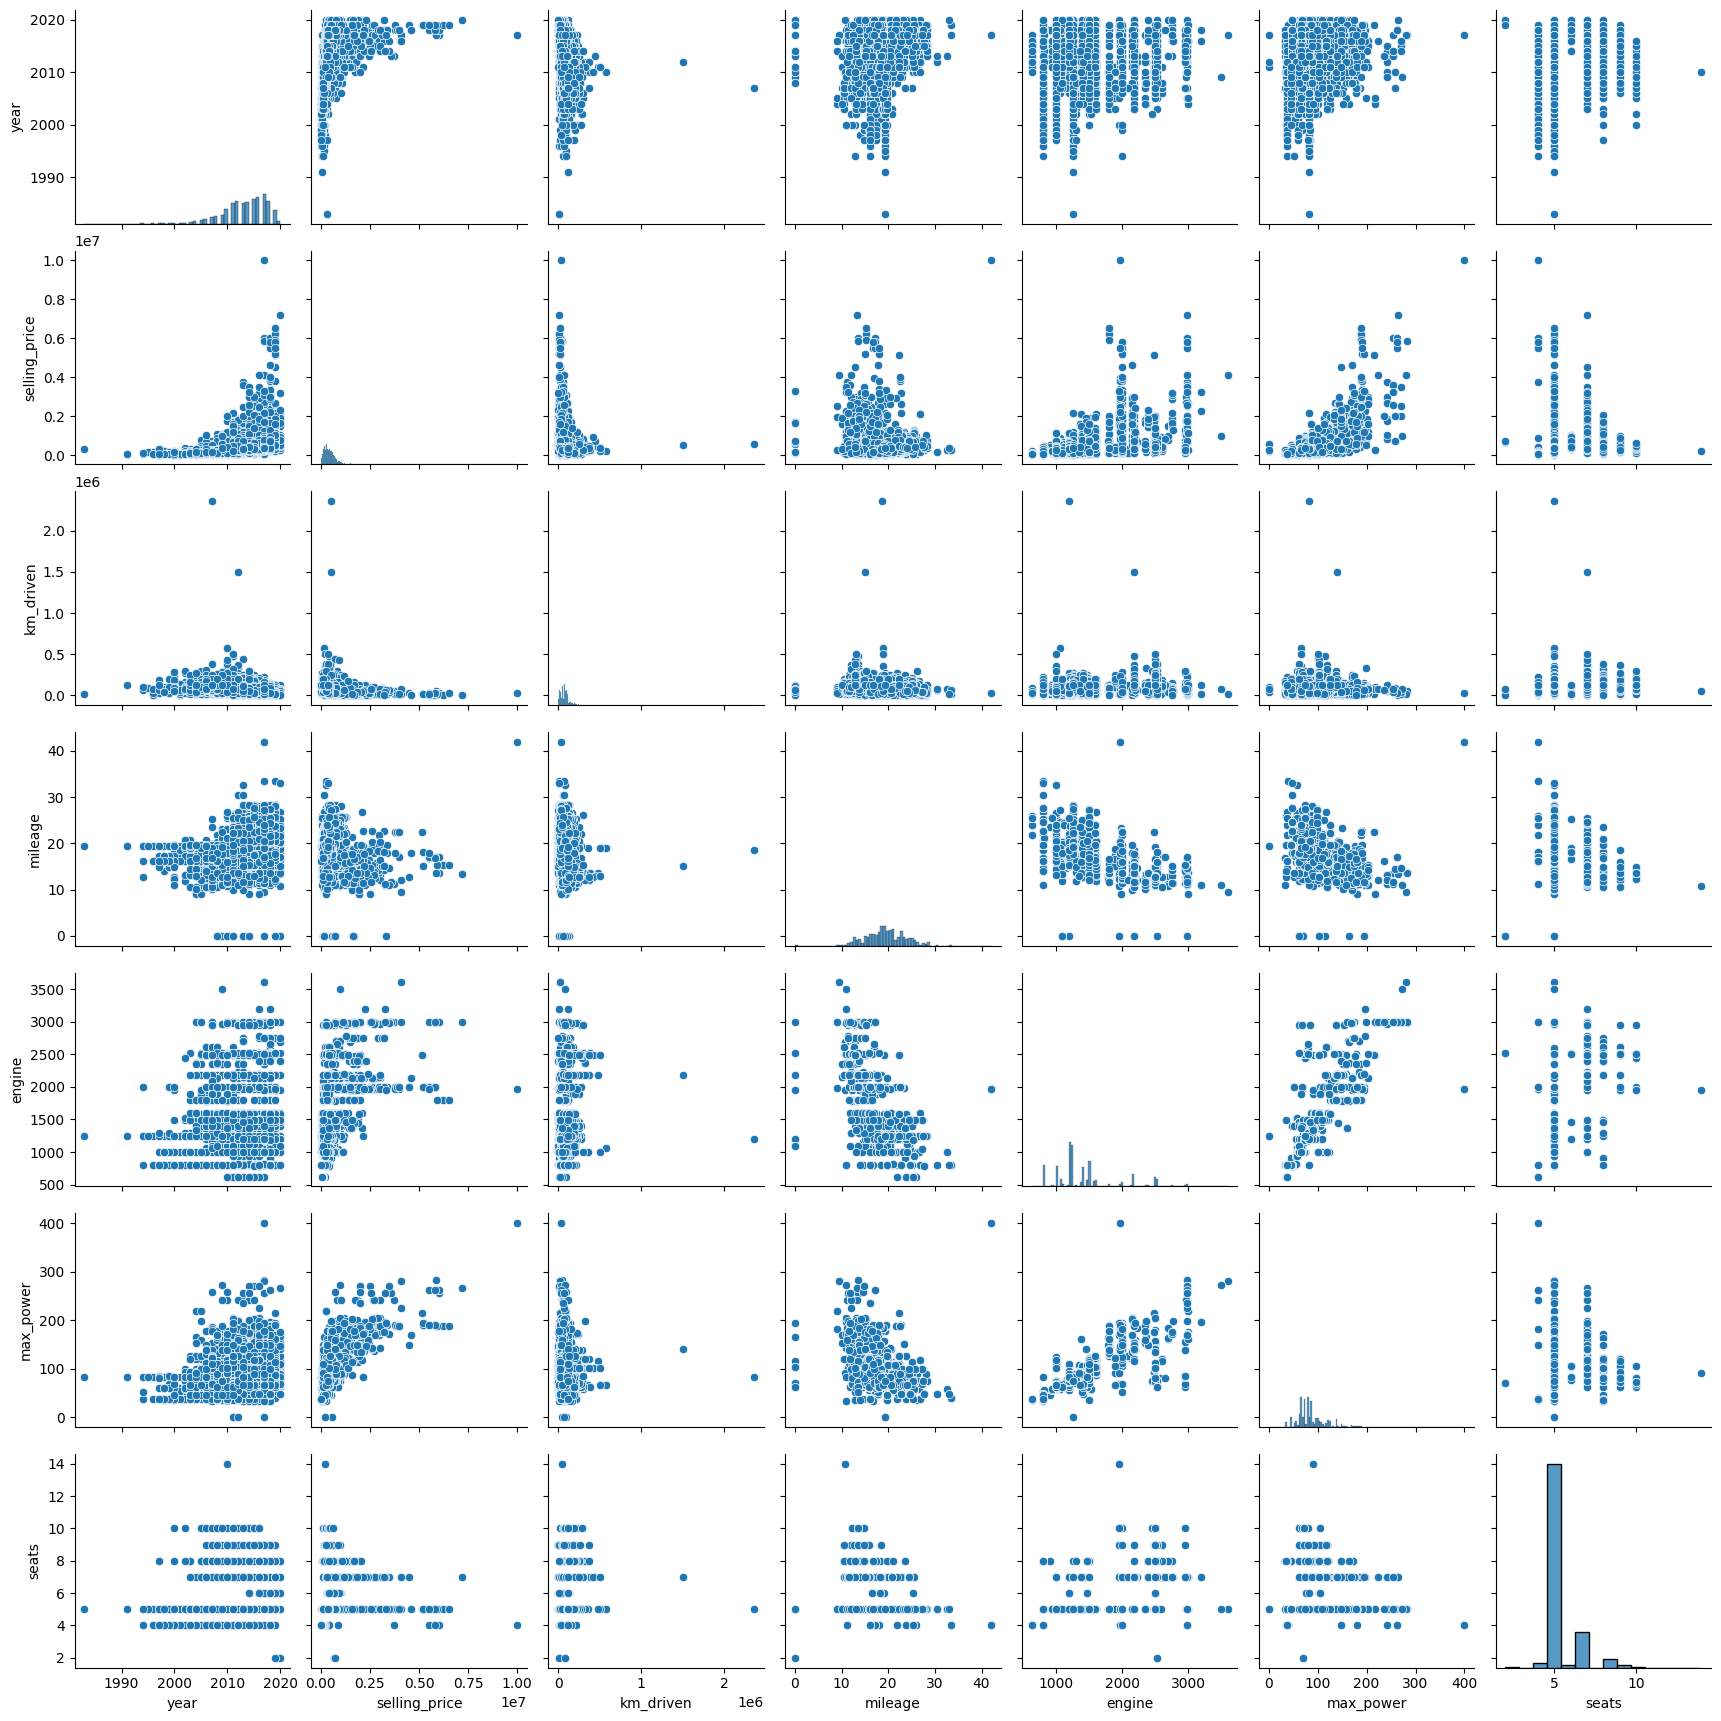

In [20]:
# your code here
sns.pairplot(df_train.select_dtypes(include='number'))

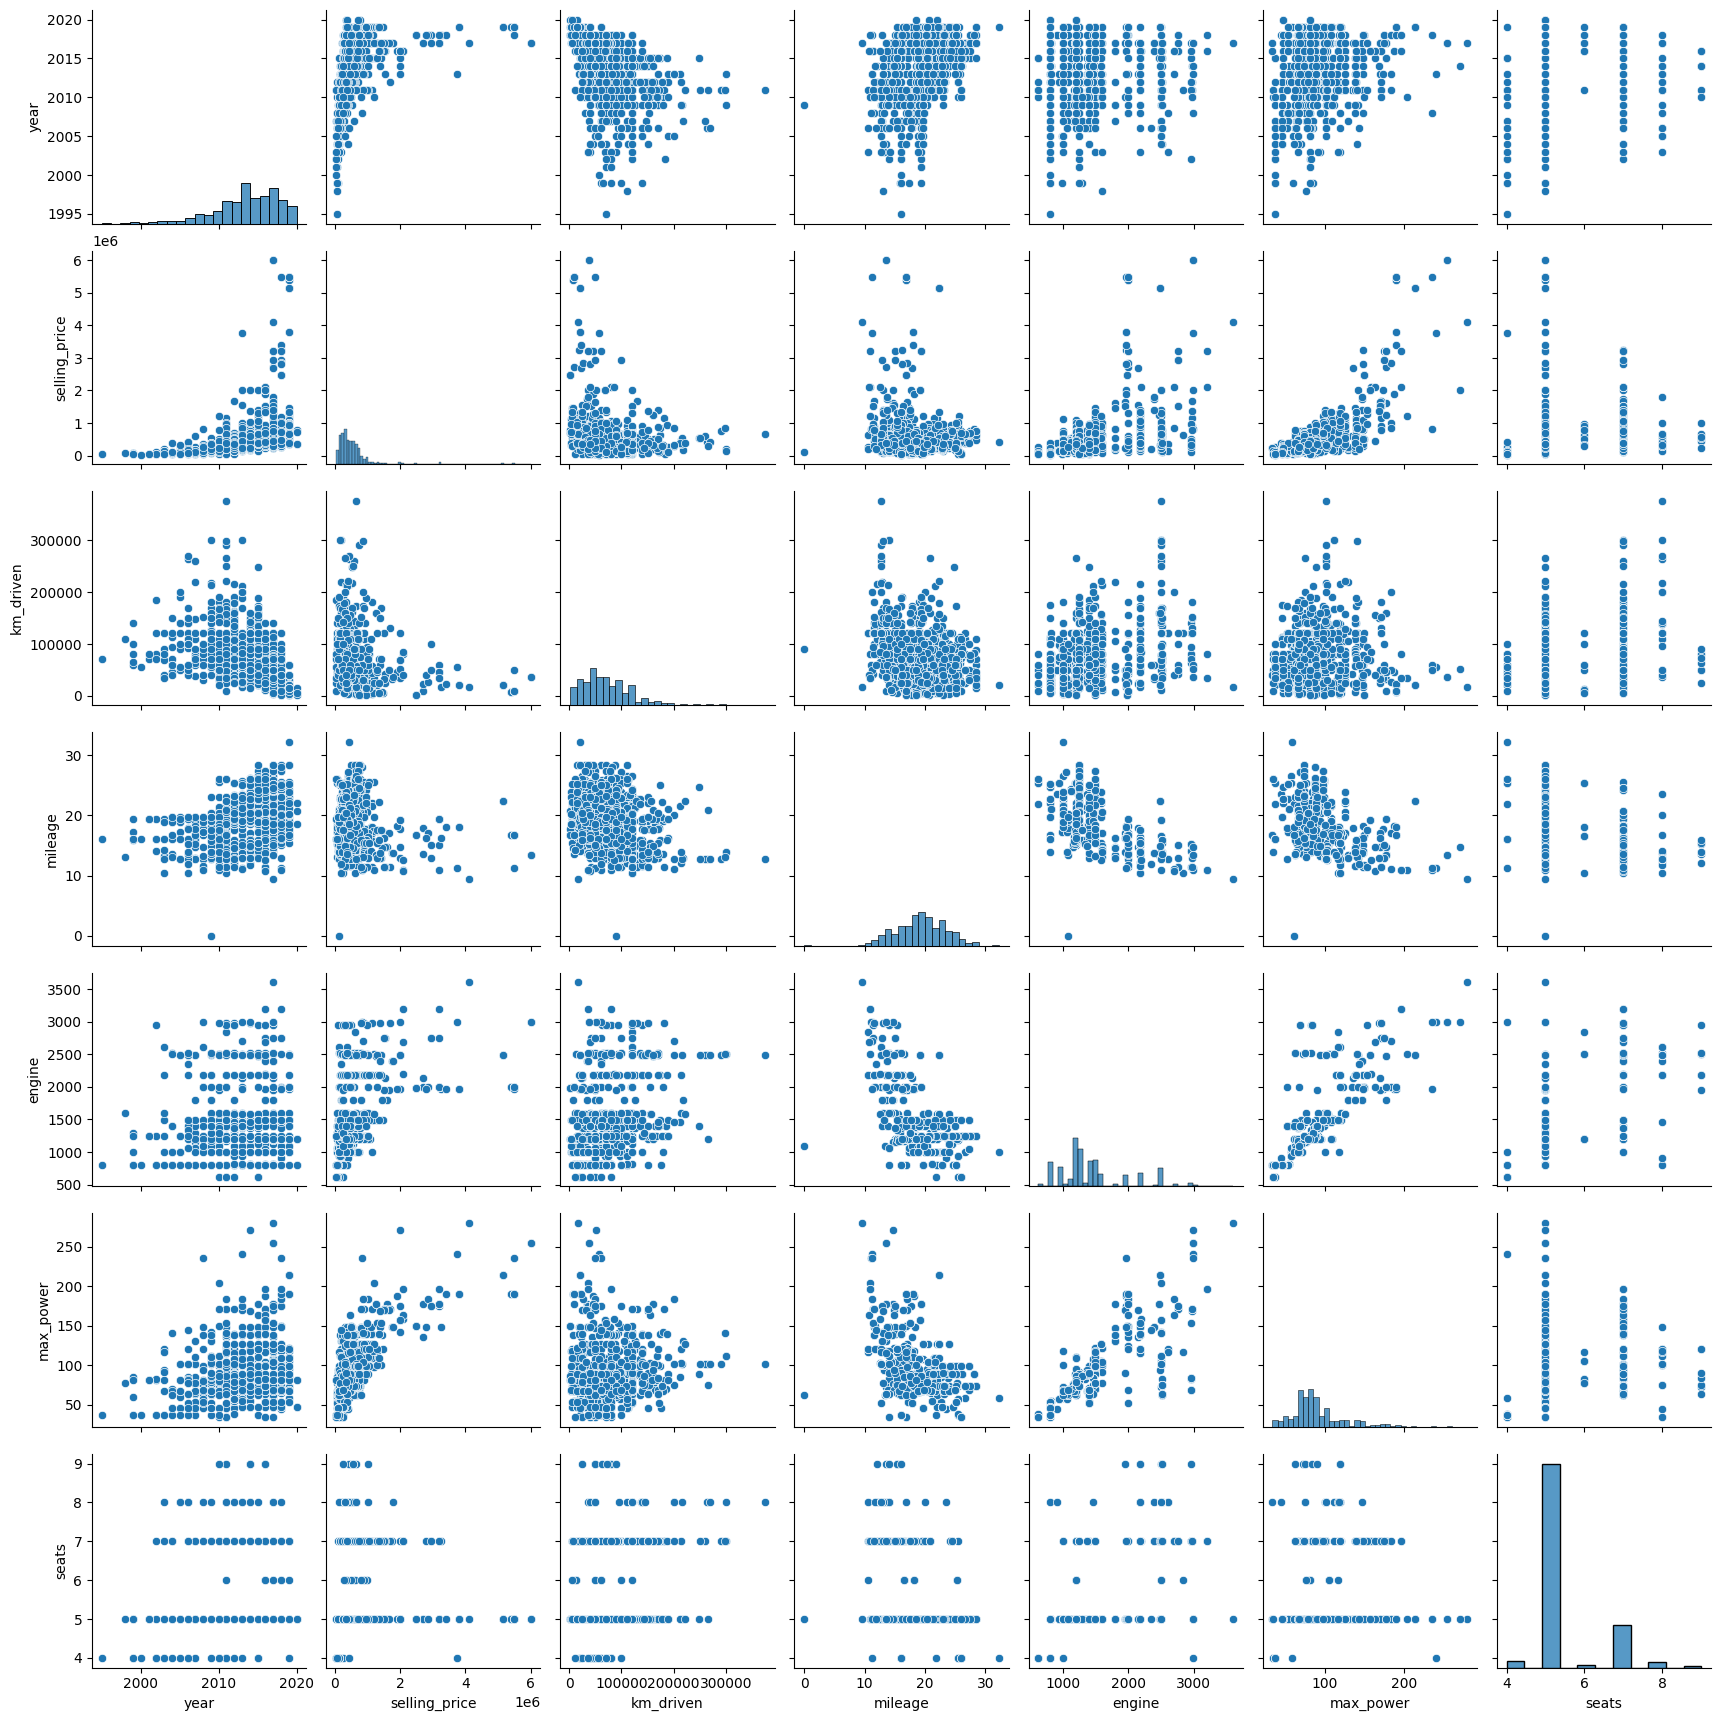

In [21]:
# your code here
sns.pairplot(df_test.select_dtypes(include='number'))

`Your answer here`

Да, на основе составленных графиков распределений можно предположить о наличии корреляции признаков с целевой переменной

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

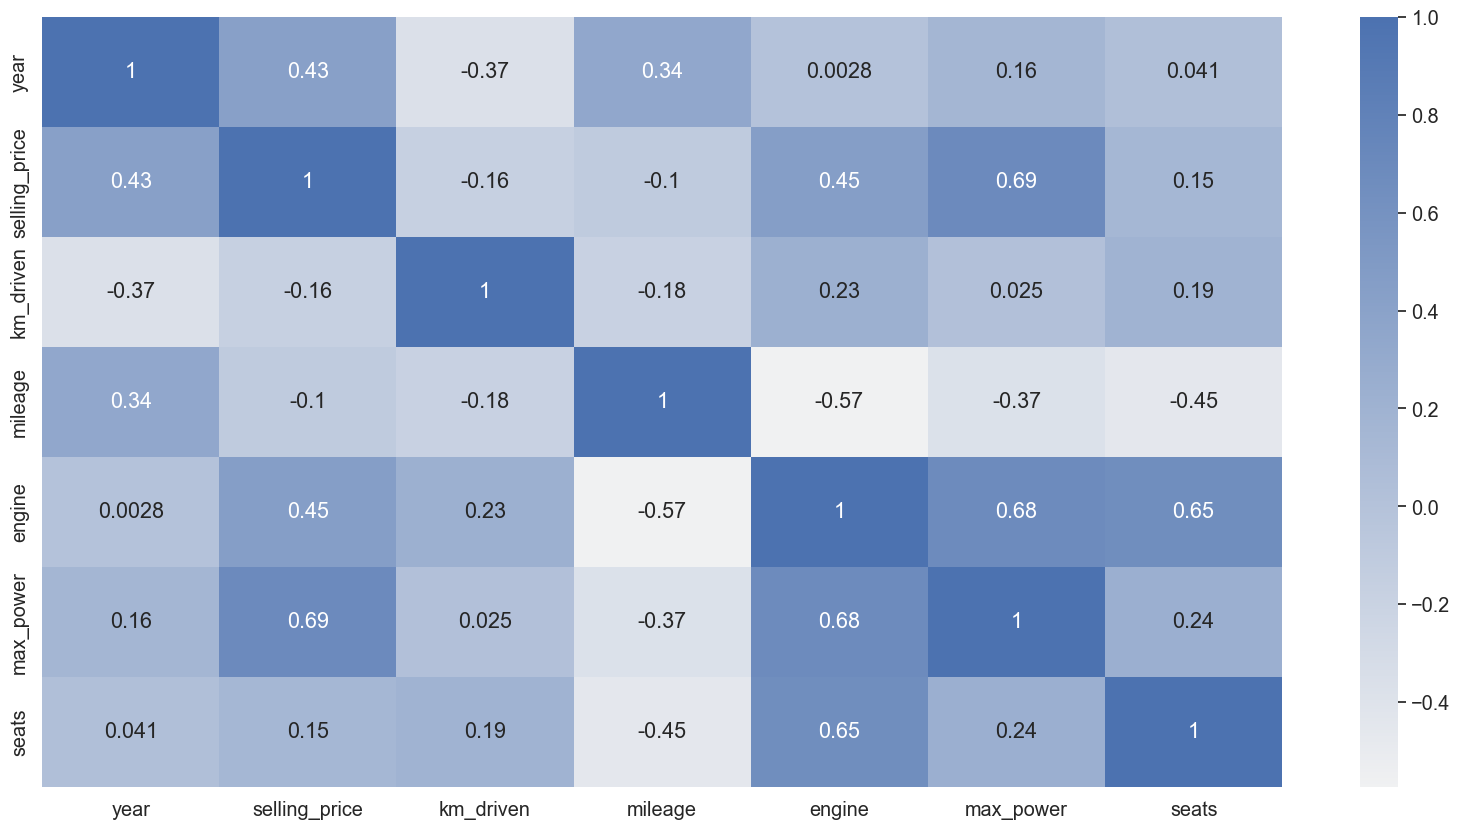

In [22]:
# your code here

sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap=sns.color_palette("light:b", as_cmap=True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

Какие 2 признака наименее скоррелированы между собой?

*year/engine*

Между какими наблюдается довольно сильная положительная линейная зависимость?

*max_power/selling_price; max_power/engine; seats/engine;* 

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

*Да*

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Мне кажется интересным посмотреть на то как коррелируют с целевой переменной категориальные признаки

In [23]:
df_train.loc[df_train['transmission'] == 'Manual']['selling_price'].median()

386500.0

C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


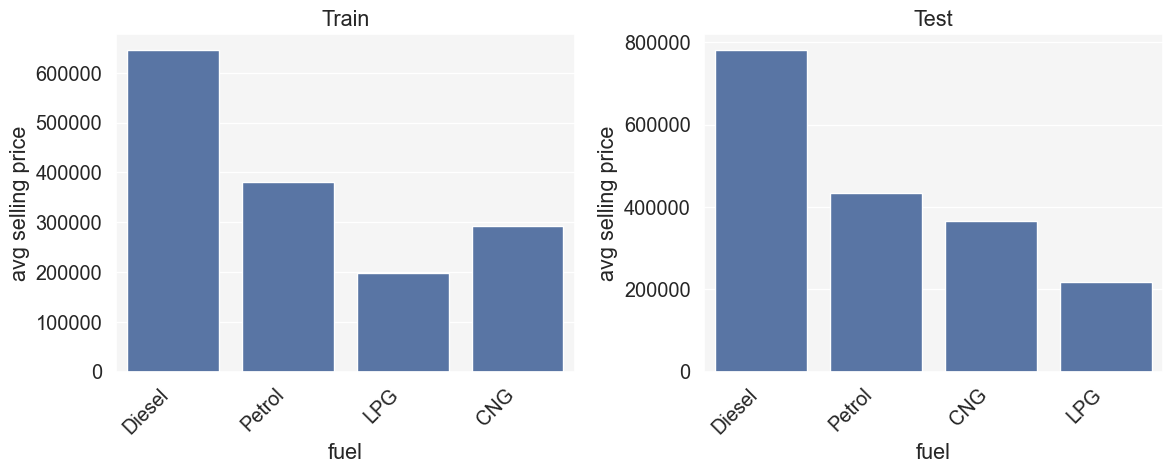

C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


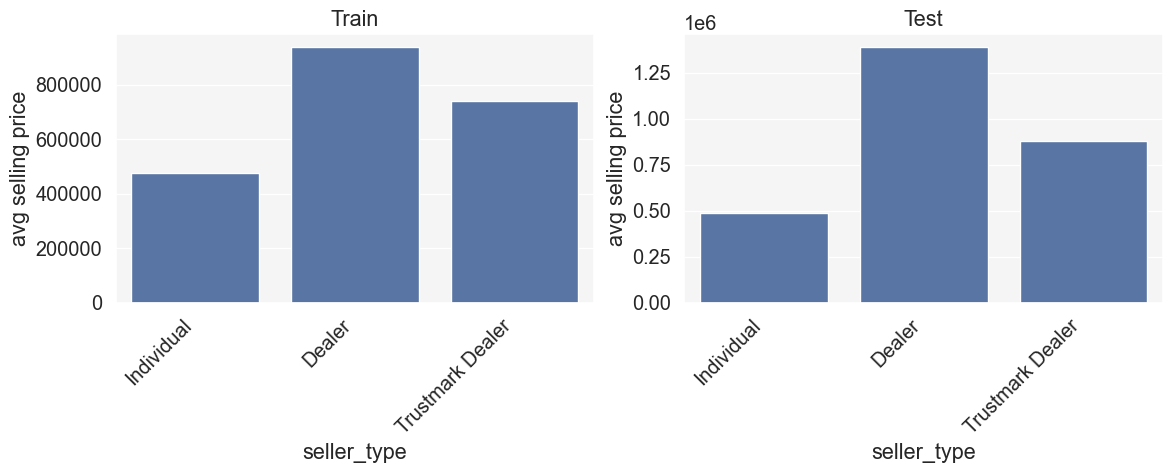

C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


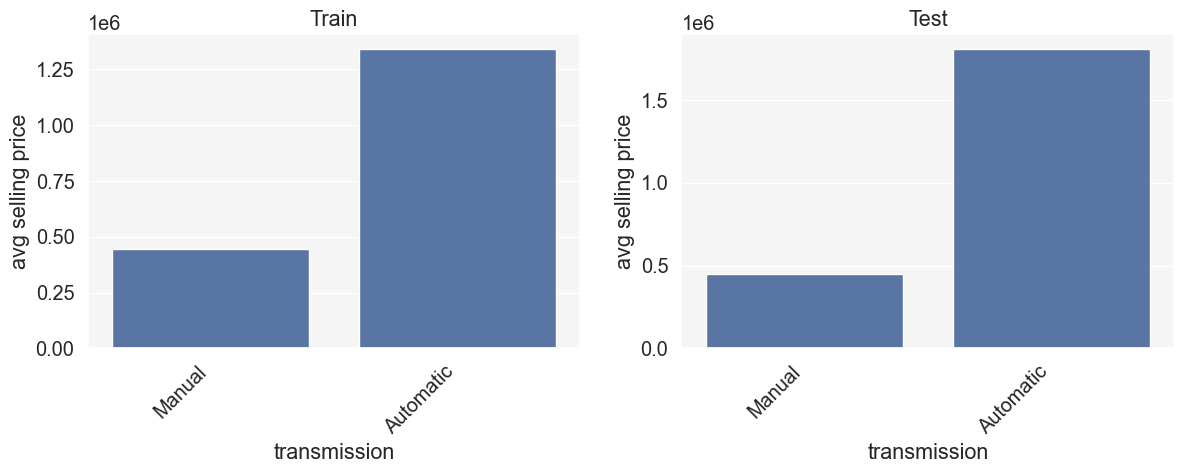

C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\crugl\AppData\Local\Temp\ipykernel_16640\1171015410.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


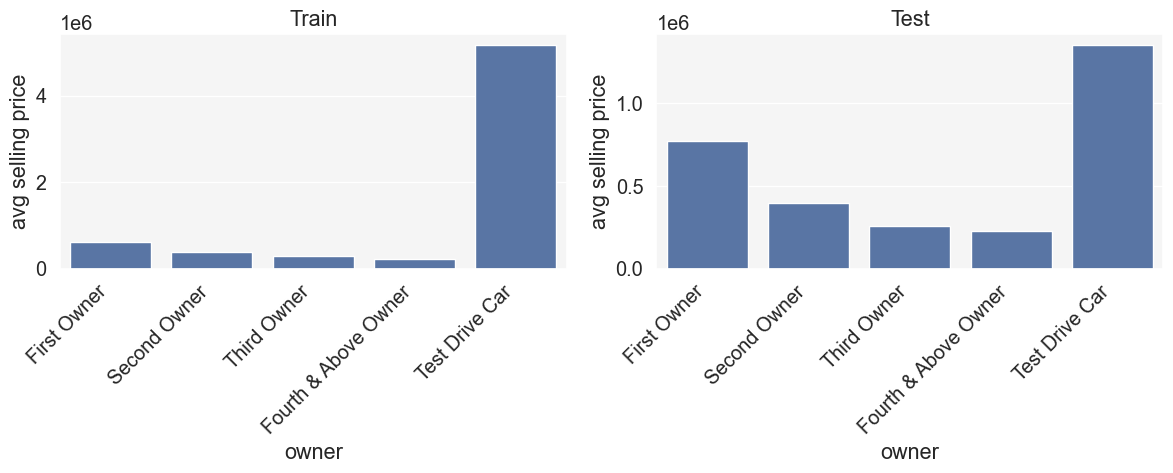

In [25]:
for i in df_train.drop('name', axis=1).select_dtypes('object').columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Barplot для train
    sns.barplot(x=i, y='selling_price', data=df_train, ax=axes[0], errorbar=None)
    axes[0].set_title('Train')
    axes[0].set_xlabel(f'{i}')
    axes[0].set_ylabel('avg selling price')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

    # Barplot для test
    sns.barplot(x=i, y='selling_price', data=df_test, ax=axes[1], errorbar=None)
    axes[1].set_title('Test')
    axes[1].set_xlabel(f'{i}')
    axes[1].set_ylabel('avg selling price')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

    # Регулировка отступов
    plt.tight_layout()
    plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
df_train.select_dtypes(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...,...
6992,2008,120000,191000,17.92,1086,62.10,5
6993,2013,260000,50000,18.90,998,67.10,5
6994,2013,320000,110000,18.50,1197,82.85,5
6995,2007,135000,119000,16.80,1493,110.00,5


In [33]:
y_train = df_train['selling_price'] # your code here
X_train = df_train.select_dtypes(include='number').drop('selling_price', axis=1) # your code here

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test['selling_price'] # your code here
X_test = df_test.select_dtypes(include='number').drop('selling_price', axis=1) # your code here

In [36]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = model.predict(X_train)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')

Test 
 R2: 0.594141979478839 
 MSE: 233298779730.45712
Train 
 R2: 0.5922591702157309 
 MSE: 116874153930.02876


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [38]:
from sklearn.preprocessing import StandardScaler

# your code here

scaler = StandardScaler()

X_train_scail = scaler.fit_transform(X_train)

X_test_scail = scaler.transform(X_test)

model.fit(X_train_scail, y_train)

y_pred = model.predict(X_test_scail)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = model.predict(X_train_scail)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')


Test 
 R2: 0.5941419794788517 
 MSE: 233298779730.44977
Train 
 R2: 0.5922591702157305 
 MSE: 116874153930.0289


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [24]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coeff': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('coeff', ascending=False)
feature_importance

,feature,coeff
4,max_power,322807.353259
0,year,152772.570846
3,engine,61178.494337
1,km_driven,44158.818520
2,mileage,28833.925778
5,seats,23209.132486


Самым важным оказался признак max_power, что в целом очевидно, так как он сильнее всего коррелирует с целевой переменной

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [25]:
from sklearn.linear_model import Lasso

# your code here

model = Lasso()

model.fit(X_train_scail, y_train)

y_pred = model.predict(X_test_scail)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = model.predict(X_train_scail)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')

Test 
 R2: 0.5941408124026637 
 MSE: 233299450599.16928
Train 
 R2: 0.5922591701804456 
 MSE: 116874153940.1429


In [26]:
# your code here

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coeff': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('coeff', ascending=False)
feature_importance

,feature,coeff
4,max_power,322808.236919
0,year,152772.390214
3,engine,61173.662409
1,km_driven,44157.689858
2,mileage,28832.043396
5,seats,23206.255649


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [27]:
from sklearn.model_selection import GridSearchCV

# your code here

params = {
    'alpha': np.logspace(-3, 1, 50),
    'max_iter': [1000, 5000, 10000],
    'selection': ['cyclic', 'random']
    }

model = Lasso()

gs = GridSearchCV(model, params, cv=10)

gs.fit(X_train_scail, y_train)

gs.best_params_

{'alpha': 10.0, 'max_iter': 10000, 'selection': 'random'}

In [28]:
# your code here

model = Lasso(**gs.best_params_)

model.fit(X_train_scail, y_train)

y_pred = model.predict(X_test_scail)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = model.predict(X_train_scail)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')

Test 
 R2: 0.5941341632315233 
 MSE: 233303272732.6121
Train 
 R2: 0.5922591691155152 
 MSE: 116874154245.39272


In [29]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coeff': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('coeff', ascending=False)
feature_importance

,feature,coeff
4,max_power,322795.634240
0,year,152778.019979
3,engine,61172.160021
1,km_driven,44148.876218
2,mileage,28817.558257
5,seats,23213.955053


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [30]:
from sklearn.linear_model import ElasticNet

# your code here

params = {
    'alpha': np.logspace(-3, 1, 50),
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1],
    'max_iter': [1000, 5000, 10000],
    }

model = ElasticNet()

gs = GridSearchCV(model, params, cv=10)

gs.fit(X_train_scail, y_train)

gs.best_params_

{'alpha': 0.15998587196060574, 'l1_ratio': 0.1, 'max_iter': 1000}

In [31]:
model = ElasticNet(**gs.best_params_)

model.fit(X_train_scail, y_train)

y_pred = model.predict(X_test_scail)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = model.predict(X_train_scail)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')

Test 
 R2: 0.5627973736900872 
 MSE: 251316554203.0617
Train 
 R2: 0.5850345910343286 
 MSE: 118944995301.92088


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [32]:
# your code here
print(df_train['name'].value_counts())

df_train.drop('name', axis=1, inplace=True)

df_test.drop('name', axis=1, inplace=True)

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

num_features = df_train.select_dtypes(include='number').drop(['seats', 'selling_price'], axis=1).columns

cat_features = ['seats']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

pipeline = Pipeline([
    ('preprocessor', preprocessor),  # OHE + Scaling
    ('model', Ridge())  # Модель
])

param_grid = {
    'model__alpha': np.logspace(-3, 1, 50),  # От 10^-4 до 10^4
    'model__solver': ['auto', 'svd', 'cholesky'],  # Опционально
    'model__tol': [1e-3, 1e-4]  # Опционально
}

gs = GridSearchCV(pipeline, param_grid, cv=10, verbose=1)

gs.fit(X_train, y_train)

gs.best_params_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


c:\Users\crugl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\crugl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\crugl\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\crugl\anaconda3\lib\site-packages\sklearn\pipeline.py", line 1193, in score
    Xt = transform.transform(Xt)
  File "c:\Users\crugl\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\crugl\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 1100, in transform
    Xs = self._call_func_on_transformers(
  Fi

{'model__alpha': 0.001, 'model__solver': 'auto', 'model__tol': 0.001}

In [37]:
y_pred = gs.best_estimator_.predict(X_test)

r_2_test = r2_score(y_test, y_pred)

mse_test = MSE(y_test, y_pred)

y_pred_train = gs.best_estimator_.predict(X_train)

r_2_train = r2_score(y_train, y_pred_train)

mse_train = MSE(y_train, y_pred_train)

print(f'Test \n R2: {r_2_test} \n MSE: {mse_test}')

print(f'Train \n R2: {r_2_train} \n MSE: {mse_train}')

Test 
 R2: 0.6054717910658847 
 MSE: 226786080500.21988
Train 
 R2: 0.6137722415929868 
 MSE: 110707682897.47751


# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [38]:
def business_metric(y_true, y_pred):
    # your code here
    percentage_chg = np.abs((y_pred - y_true) / y_true)

    props = np.sum(percentage_chg <= 0.1) / len(percentage_chg)
    
    return props


business_metric(y_test, y_pred)

0.229

`Your answer here`

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

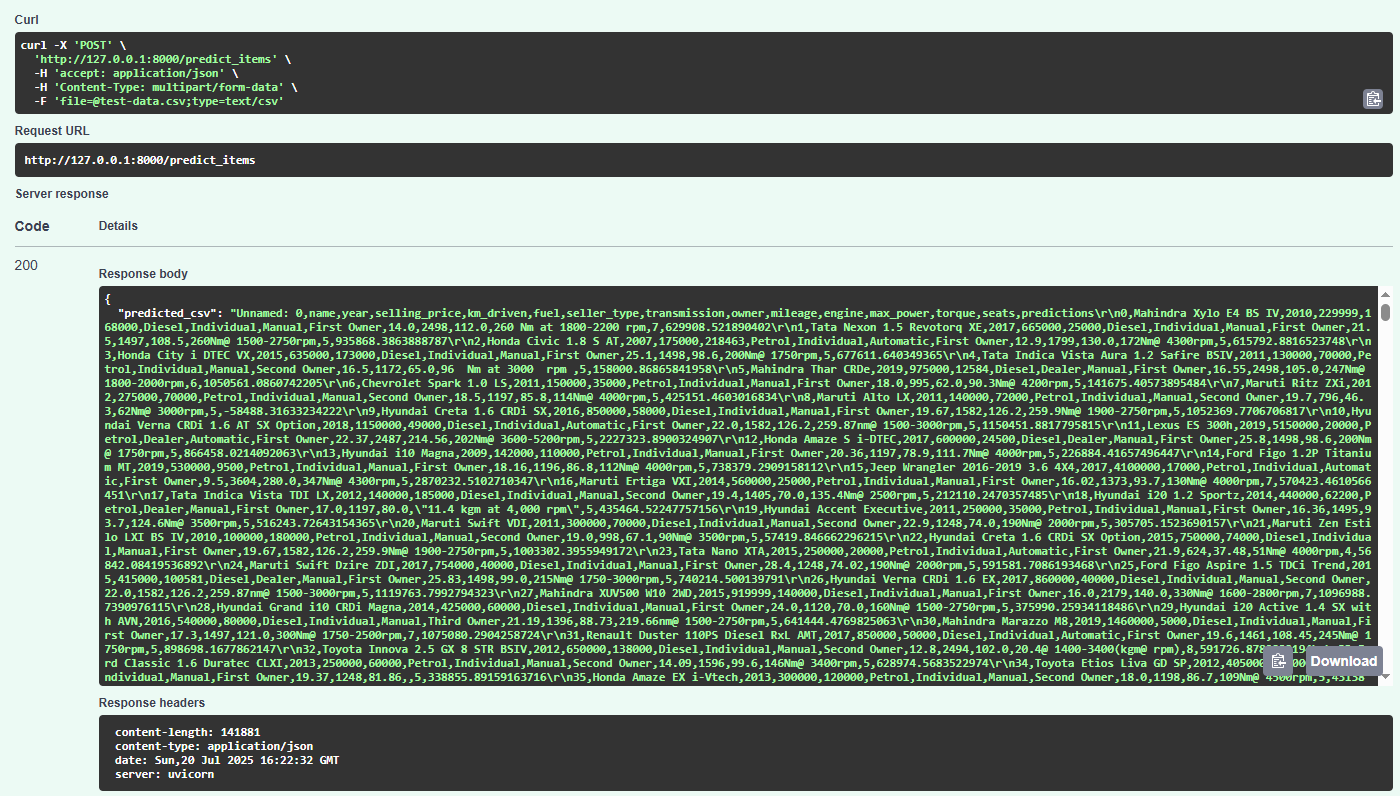

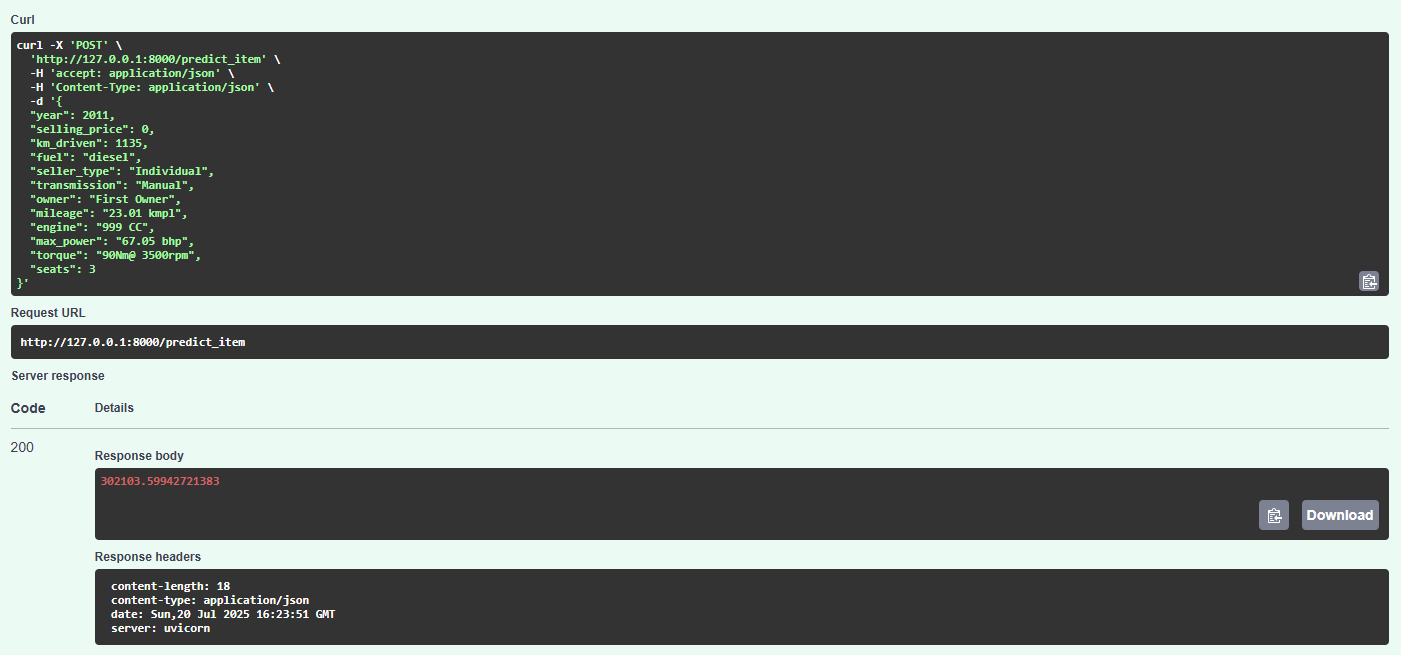

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

